In [3]:
%pylab inline

import numpy as np
import seaborn as sns

from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


# Sampling Distribution of the Mean

## Standard Error (the standard deviation of the sample means)

**표준오차** (Standard Error)는 표본평균을 찾아서 모평균을 추정할때 얼마나 정확하게 모평균을 추정하는지 판단할때 사용합니다 (**평균의 정확도**)

Central limit theorem ( $ n >= 30 $ 일때 유효함)에 따르면 sample size n이 커짐에 따라, 표본평균의 분포 (the distribution of the sample means)는 모집단의 분포 (the distribution of the population)과는 상관없이 정규분포를 따릅니다. 

sample size가 커짐에 따라서, 표본 평균은 분포의 중심(the center of the distribution)에 점차 수렴되기 때문에 std는 줄어듭니다<br>
아래의 공식은 표본 평균들의 표준편차 (표준오차)의 공식입니다.

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$

* $ \sigma_{\bar{x}} $ The standard deviation of the sample means (표본 평균들의 표준편차) - 공식적인 용어로는 [standard error (**표준오차**)](https://en.wikipedia.org/wiki/Standard_error) 라고 함 
* $ \sigma $ : the standard deviation of the population (모집단의 표준편차)
* $ n $ : sample size

population mean: 2.512870592483228
sample mean(1) : 2.717197085622836
sample mean(2) : 2.5490322923185276 <- 표본크기가 커짐에 따라 표본평균은 모집단의 평균을 approximate한다

population std: 2.550553770081959
sample std(1) : 2.318836613954905
sample std(2) : 0.2823368191070161 <- 표본크기가 커짐에 따라 표본표준편차는 줄어든다

standard error(1): 0.46566527800124463
standard error(1): 0.04656652780012446


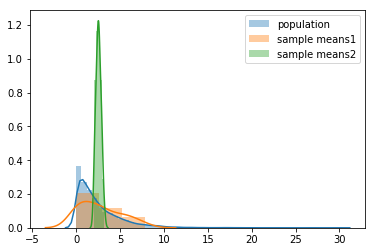

In [154]:
population = np.random.exponential(2.5, size=10000)
sample_means1 = [np.random.choice(population, 1).mean() for _ in range(30)]
sample_means2 = [np.random.choice(population, 100).mean() for _ in range(30)]

print('population mean:', population.mean())
print('sample mean(1) :', np.mean(sample_means1))
print('sample mean(2) :', np.mean(sample_means2), '<- 표본크기가 커짐에 따라 표본평균은 모집단의 평균을 approximate한다')
print()
print('population std:', population.std())
print('sample std(1) :', np.std(sample_means1))
print('sample std(2) :', np.std(sample_means2), '<- 표본크기가 커짐에 따라 표본표준편차는 줄어든다')
print()
print('standard error(1):', population.std()/np.sqrt(30))
print('standard error(1):', population.std()/np.sqrt(100*30))

sns.distplot(population, label='population')
px = sns.distplot(sample_means1, label='sample means1')
px = sns.distplot(sample_means2, label='sample means2')

legend()

### Problem 1

샘플링을 통해서 아래와 같은 데이터를 얻었고.. 표본평균의 정확도를 알아보기 위해서 표준오차를 계산하여라

[14, 36, 45, 70, 105]


In [164]:
data = [14, 36, 45, 70, 105]
print('standard error:', np.std(data)/np.sqrt(len(data)))

standard error: 13.945608627808252


### Problem 2
Q. 30대 남성의 혈압은 정규분포를 따르며, 평균 122 mmHg 그리고 표준편차는 10mmHg.<br>
이때 16명의 남성이 선택되었고 표본평균이 125mmHg 이상일 확률은?

In [162]:
se = 10/np.sqrt(16)
print('standard error:', se)
print('125mmHg 이상일 확률:', 1 - norm(loc=122, scale=se).cdf(125))

standard error: 2.5
125mmHg 이상일 확률: 0.11506967022170822


## Finite Population Correction Factor 유한 모집단 수정 계수


만약 아래의 조건처럼 모집단의 크기와 표본의 크기를 비교했을때, 표본집단이 5% 이상을 넘는다면 finite population correction factor를 적용해야 합니다. <br> population size가 크다면 샘플링시에 크게 영향이 없습니다. <br>
예를 들어서 미국인 전체 인구중에서 샘플링을 한다면 이번에 남자가 나왔을때 다음 남자가 뽑힐 확률에 크게 영향을 미치지 않습니다. <br>

그런데.. population size 자체가 작고, 샘플링을 했을때 예를 들어서 바구니에 10개의 파란색 그리고 빨간색 구슬이 들어있을때, <br>
이번에 파란색 구슬을 뽑았다면.. 그 다음 파란색이 나올 확률이 크게 변하게 됩니다. (이미 파란색을 뽑았기 때문에..)

따라서 population size가 작고, 일반적으로 sample size가 population size의 5% 이상이 된다면.. <br>
Finite population correction factor $ \sqrt{ \frac{N-n}{N-1}} $ 를 적용해야 합니다

$$ \text{if}\ \frac{n}{N} > 0.05 $$


$$ \begin{align} \sigma_{\bar{x} } = \frac{\sigma}{\sqrt{n}} \sqrt{ \frac{N-n}{N-1}}   
\end{align} $$


아래의 코드에서 보여주듯이, finite population correction factor를 적용시 일반적인 standard error보다 더 낮은 standard error값을 내 놓는다

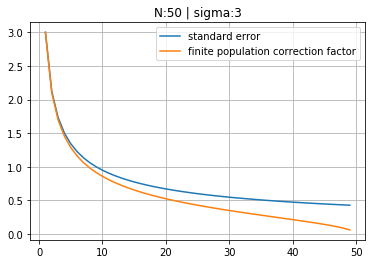

In [25]:
N = 50
sigma = 3
n = np.arange(1, N)

sns.lineplot(n, sigma/np.sqrt(n), label='standard error')
sns.lineplot(n, sigma/np.sqrt(n) * np.sqrt( (N-n)/(N-1)), label='finite population correction factor')
title(f'N:{N} | sigma:{sigma}')
grid()
print()